<a href="https://colab.research.google.com/github/ShravyaMalogi/Data-Analytics/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIXEL ORIENTED VISUALIZATION

**Pixel Bar Chart**

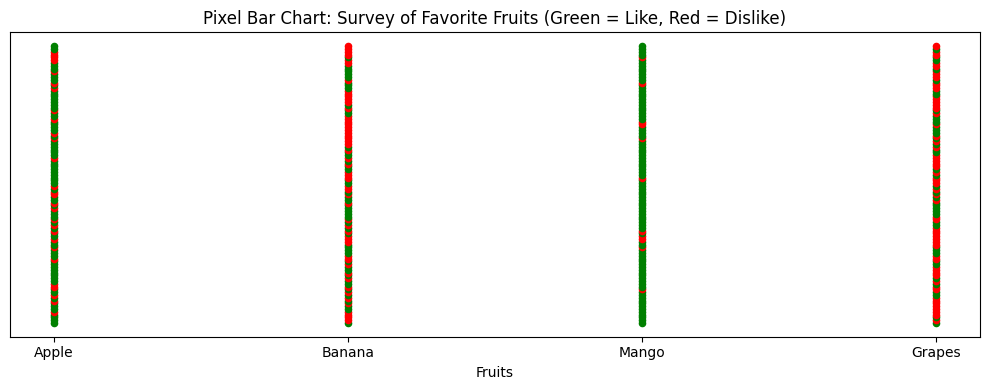

In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Categories and total responses (simulate responses)
categories = ['Apple', 'Banana', 'Mango', 'Grapes']
responses = {
    'Apple': np.random.choice(['👍', '👎'], size=100, p=[0.7, 0.3]),
    'Banana': np.random.choice(['👍', '👎'], size=100, p=[0.5, 0.5]),
    'Mango': np.random.choice(['👍', '👎'], size=100, p=[0.9, 0.1]),
    'Grapes': np.random.choice(['👍', '👎'], size=100, p=[0.4, 0.6]),
}

# Plot pixel bar chart
plt.figure(figsize=(10, 4))
for i, (fruit, votes) in enumerate(responses.items()):
    for j, vote in enumerate(votes):
        color = 'green' if vote == '👍' else 'red'
        plt.scatter(i, j, color=color, s=20)

# Formatting
plt.xticks(range(len(categories)), categories)
plt.yticks([])
plt.title("Pixel Bar Chart: Survey of Favorite Fruits (Green = Like, Red = Dislike)")
plt.xlabel("Fruits")
plt.grid(False)
plt.tight_layout()
plt.show()

**Recursive Pattern - Z-Pattern**

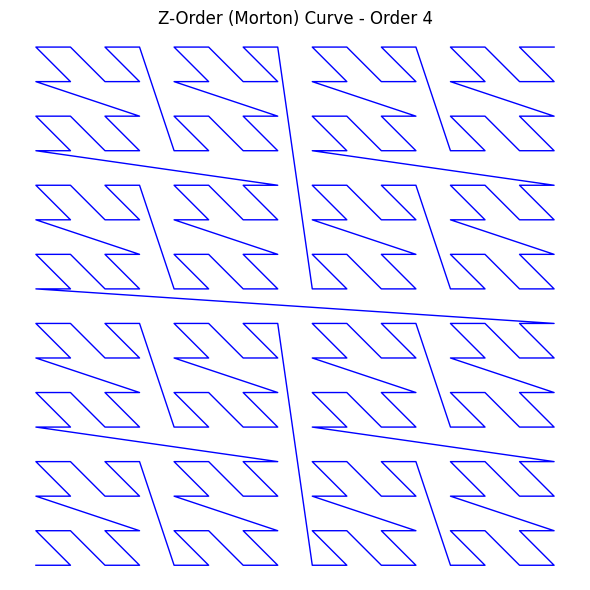

In [7]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def generate_z_order(n):
    """Generate (x, y) points in Z-order (Morton order) for 2^n x 2^n grid"""
    size = 2 ** n
    coords = []

    def fill(x, y, size):
        if size == 1:
            coords.append((x, y))
            return
        half = size // 2
        fill(x, y, half)                 # Top-left
        fill(x + half, y, half)          # Top-right
        fill(x, y + half, half)          # Bottom-left
        fill(x + half, y + half, half)   # Bottom-right

    fill(0, 0, size)
    return coords

# Generate Z-order points
n = 4  # 16x16 grid
points = generate_z_order(n)
x_vals, y_vals = zip(*points)

# Plot the Z-pattern as a line
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, color='blue', linewidth=1)
plt.title("Z-Order (Morton) Curve - Order 4")
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()


**Hilbert Curve**

In [3]:
# @title
pip install hilbertcurve

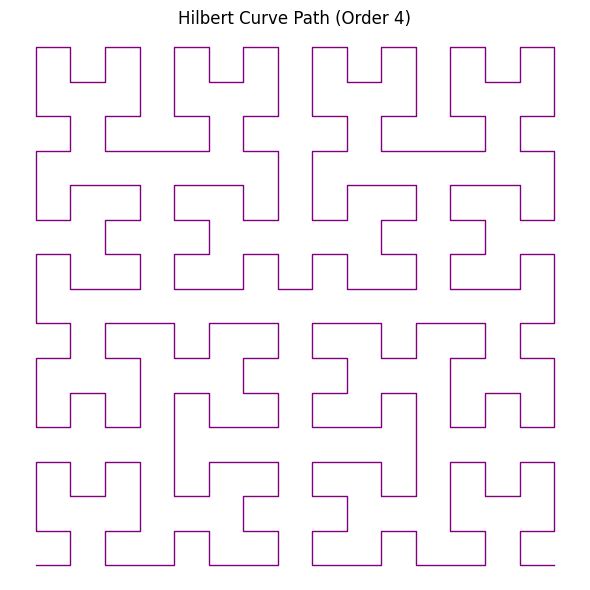

In [6]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

# 1. Define the Hilbert curve
p = 4  # Order (2^p = 16x16 grid)
N = 2  # Dimensions (2D)
hilbert_curve = HilbertCurve(p, N)

# 2. Get all points on the curve
points = [hilbert_curve.point_from_distance(i) for i in range(2**(p * N))]

# 3. Convert to X, Y for plotting
x_vals = [pt[0] for pt in points]
y_vals = [pt[1] for pt in points]

# 4. Plot the curve path
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, color='purple', linewidth=1)
plt.title("Hilbert Curve Path (Order 4)")
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
plt.show()


**Pixel-Oriented Circle Segment Technique**

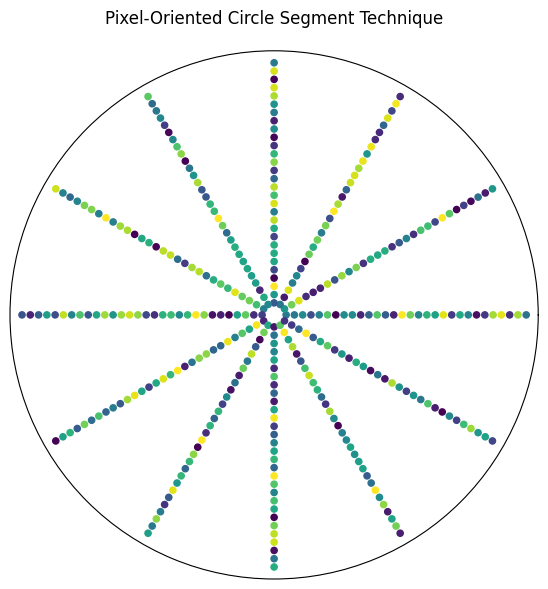

In [8]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy data: 12 segments (like clock hours), each with 30 pixel-values
n_segments = 12
pixels_per_segment = 30
data = np.random.rand(n_segments, pixels_per_segment)  # shape = (12, 30)

# Create polar coordinate grid
theta_step = 2 * np.pi / n_segments
radii = np.linspace(0.2, 1.0, pixels_per_segment)

# Plot setup
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.set_xticks([]); ax.set_yticks([])

# Plot each pixel as a colored dot in a radial segment
for i in range(n_segments):
    theta = np.full(pixels_per_segment, i * theta_step)
    r = radii
    colors = data[i]
    ax.scatter(theta, r, c=colors, cmap='viridis', s=20)

plt.title("Pixel-Oriented Circle Segment Technique", pad=20)
plt.tight_layout()
plt.show()


**Spiral Pixel-Oriented Visualization**

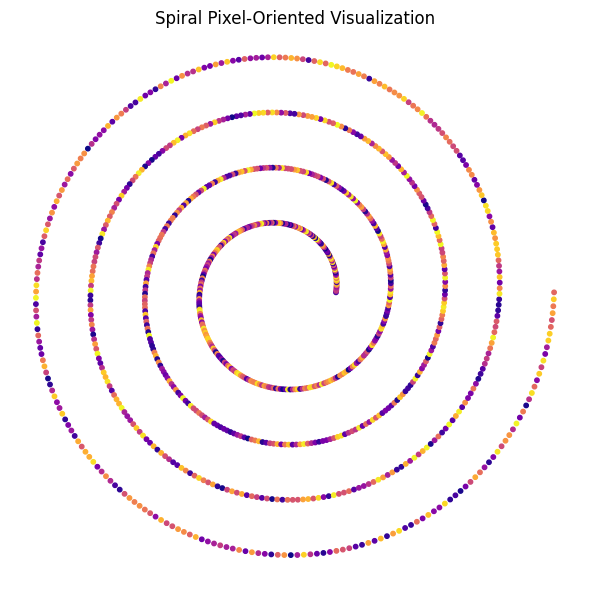

In [9]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate pixel data (e.g., temperature readings over time)
n_pixels = 1000
data = np.random.rand(n_pixels)  # values between 0 and 1

# 2. Generate spiral coordinates
# Spiral: r = a + bθ
theta = np.linspace(0, 8 * np.pi, n_pixels)  # 4 full spirals
r = np.linspace(0.2, 1.0, n_pixels)  # increasing radius

# 3. Convert polar to Cartesian for plotting
x = r * np.cos(theta)
y = r * np.sin(theta)

# 4. Plot each pixel as a colored dot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=data, cmap='plasma', s=10)
plt.title("Spiral Pixel-Oriented Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()


# Geometric Projection Visualization Techniques

**Scatter Plot Matrix (SPLOM)**

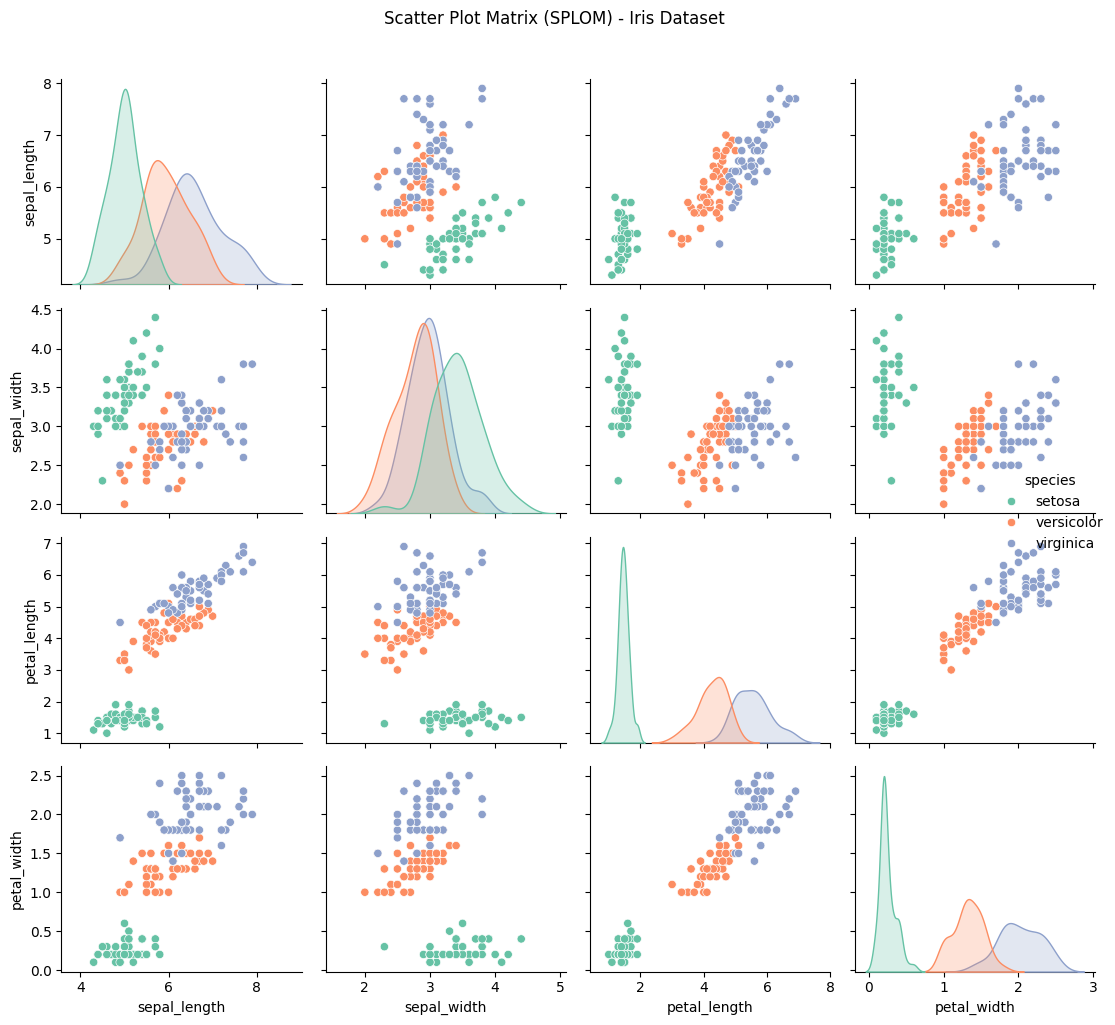

In [10]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = sns.load_dataset("iris")  # Columns: sepal_length, sepal_width, petal_length, petal_width, species

# Create Scatter Plot Matrix (SPLOM)
sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde")

plt.suptitle("Scatter Plot Matrix (SPLOM) - Iris Dataset", y=1.02)
plt.tight_layout()
plt.show()

**Principal Component Analysis (PCA)**

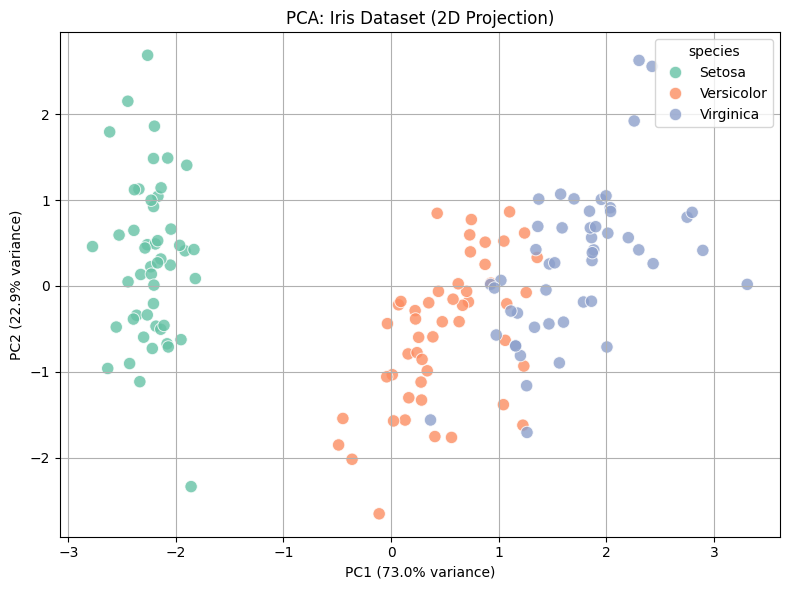

In [12]:
# @title
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Load Iris data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply PCA (reduce to 2 dimensions for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# 5. Plot
plt.figure(figsize=(8, 6))
# Add species names as a column for hue
df_pca['species'] = df_pca['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='species',
    palette='Set2',
    s=80,
    alpha=0.8
)

plt.title("PCA: Iris Dataset (2D Projection)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

**t-SNE (t-distributed Stochastic Neighbor Embedding)**

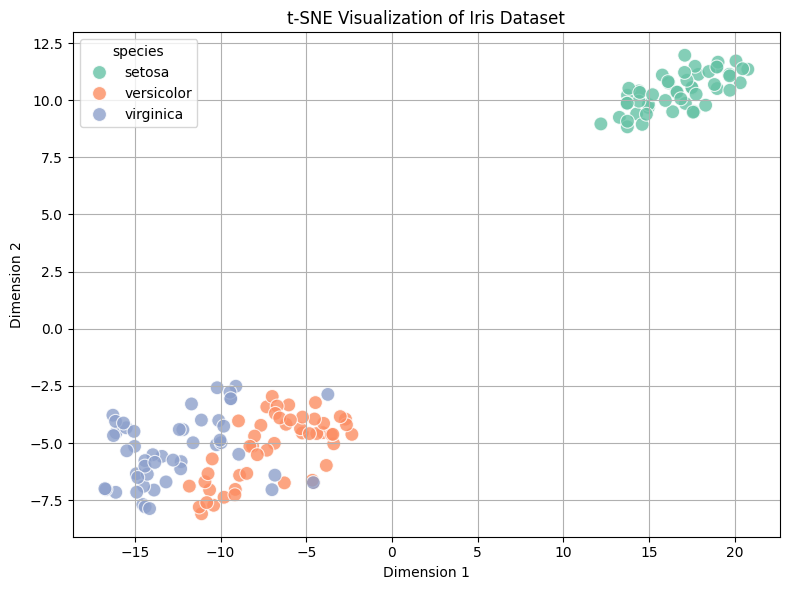

In [13]:
# @title
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1. Load data
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# 2. Standardize features
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 4. Create DataFrame for plotting
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['species'] = [labels[i] for i in y]

# 5. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='species', palette='Set2', s=100, alpha=0.8)
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.show()

**Multidimensional Scaling (MDS)**

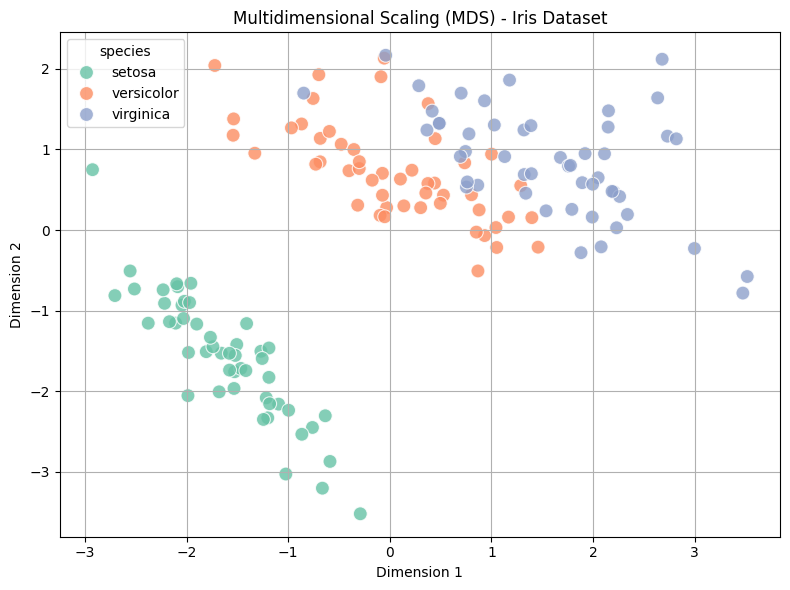

In [14]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize features
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply MDS
mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean', n_init=4, max_iter=300)
X_mds = mds.fit_transform(X_scaled)

# 4. Prepare DataFrame for plotting
df_mds = pd.DataFrame(X_mds, columns=['Dim1', 'Dim2'])
df_mds['species'] = [target_names[i] for i in y]

# 5. Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mds, x='Dim1', y='Dim2', hue='species', palette='Set2', s=100, alpha=0.8)
plt.title("Multidimensional Scaling (MDS) - Iris Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.show()

**UMAP (Uniform Manifold Approximation and Projection)**

In [15]:
# @title
pip install umap-learn

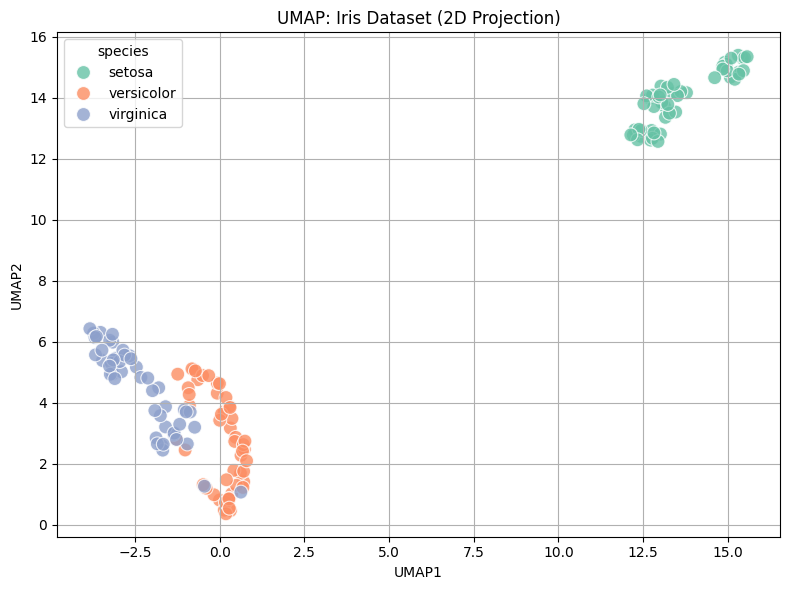

In [16]:
# @title
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import umap

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# 2. Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 4. Create DataFrame for plotting
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['species'] = [labels[i] for i in y]

# 5. Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='species', palette='Set2', s=100, alpha=0.8)
plt.title("UMAP: Iris Dataset (2D Projection)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Icon Based Visualizations

**Chernoff faces**

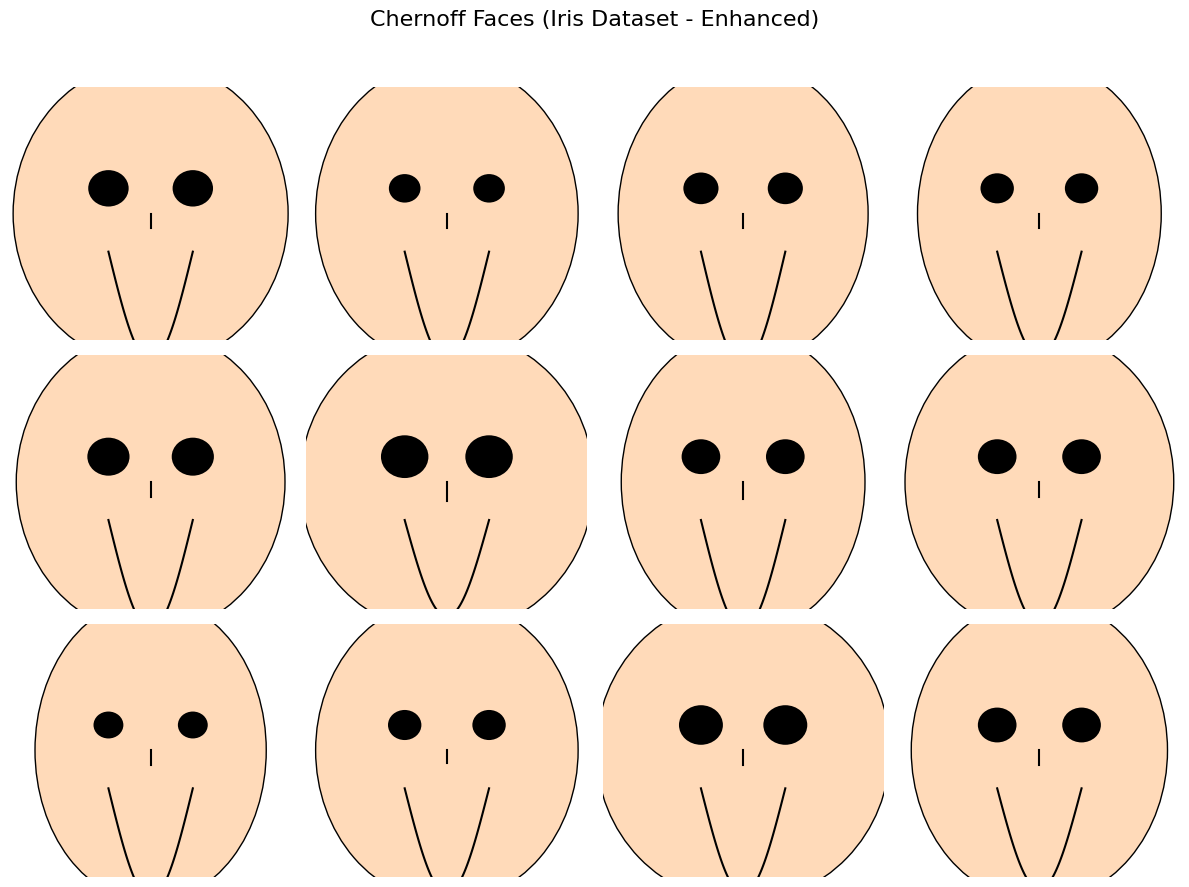

In [19]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.patches import Ellipse

# Load and normalize Iris dataset
iris = load_iris()
X = iris.data
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))  # normalize 0–1

# Each sample: [face_width, eye_size, mouth_curve, nose_length]
def draw_face(ax, features):
    face_width = 0.8 + features[0] * 0.8       # sepal length
    face_height = 1.2                          # constant height
    eye_size = 0.05 + features[1] * 0.15       # sepal width
    mouth_curve = features[2] - 0.5            # petal length
    nose_length = 0.05 + features[3] * 0.2     # petal width

    # Face outline
    ax.add_patch(Ellipse((0.5, 0.5), face_width, face_height, edgecolor='black', facecolor='peachpuff'))

    # Eyes
    ax.add_patch(Ellipse((0.35, 0.6), eye_size, eye_size, facecolor='black'))
    ax.add_patch(Ellipse((0.65, 0.6), eye_size, eye_size, facecolor='black'))

    # Nose
    ax.plot([0.5, 0.5], [0.5, 0.5 - nose_length], color='black')

    # Mouth (curve using sine)
    x_mouth = np.linspace(0.35, 0.65, 100)
    y_mouth = 0.35 + mouth_curve * np.sin((x_mouth - 0.35) * np.pi / 0.3)
    ax.plot(x_mouth, y_mouth, color='black')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

# Plot first 12 faces
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle("Chernoff Faces (Iris Dataset - Enhanced)", fontsize=16)

for i, ax in enumerate(axs.flat):
    draw_face(ax, X_norm[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Star Plots**

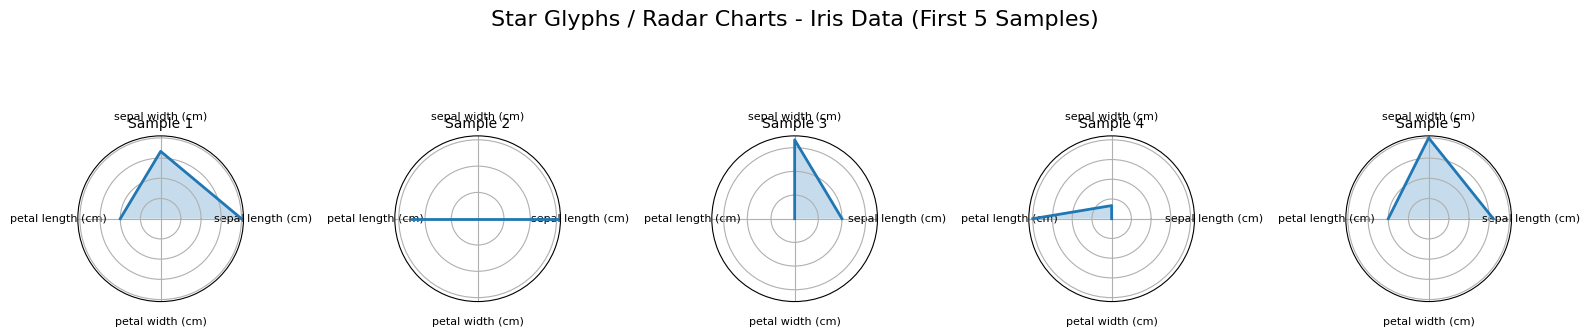

In [20]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load and normalize Iris data
iris = load_iris()
data = iris.data[:5]  # first 5 rows
features = iris.feature_names

# Normalize the data (0 to 1)
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Setup: each axis is a feature
num_vars = len(features)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # repeat the first to close the circle

# Plot each observation
fig, axs = plt.subplots(1, 5, subplot_kw=dict(polar=True), figsize=(16, 4))
fig.suptitle("Star Glyphs / Radar Charts - Iris Data (First 5 Samples)", fontsize=16)

for i in range(5):
    values = data_norm[i].tolist()
    values += values[:1]  # repeat first value to close the circle
    axs[i].plot(angles, values, color='tab:blue', linewidth=2)
    axs[i].fill(angles, values, color='tab:blue', alpha=0.25)
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(features, fontsize=8, rotation=45)
    axs[i].set_yticklabels([])
    axs[i].set_title(f"Sample {i+1}", fontsize=10)

plt.tight_layout()
plt.show()

**Stick Figures / Flow Glyphs**

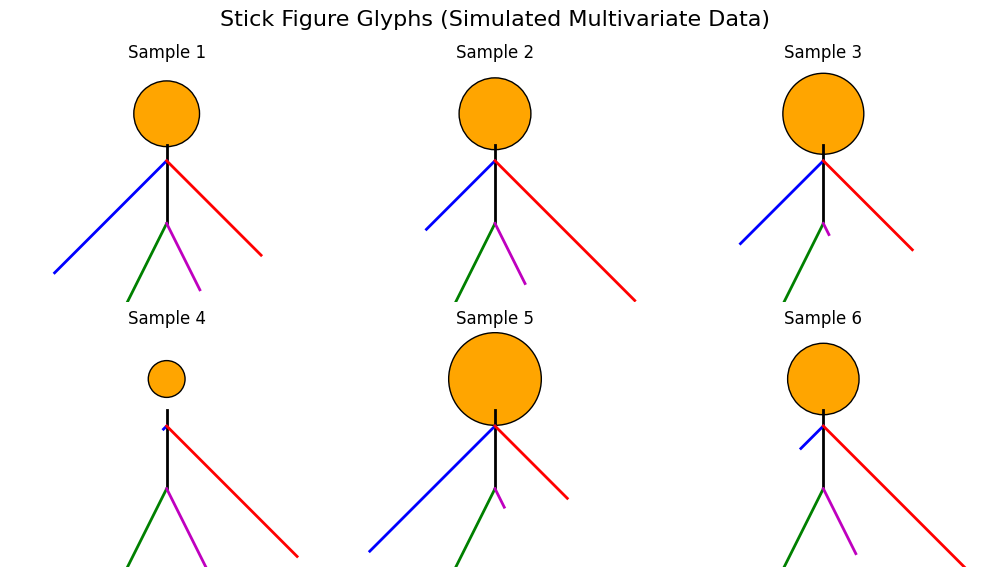

In [21]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Simulate 6 samples with 5 features each
np.random.seed(0)
data = np.random.rand(6, 5)  # [head, left arm, right arm, left leg, right leg]

def draw_stick_figure(ax, features):
    head, l_arm, r_arm, l_leg, r_leg = features

    # Draw head
    ax.add_patch(plt.Circle((0, 1.2), 0.1 + head * 0.2, color='orange', ec='black'))

    # Draw torso
    ax.plot([0, 0], [1.0, 0.5], 'k-', lw=2)

    # Arms (shoulders at y=0.9)
    ax.plot([0, -l_arm], [0.9, 0.9 - l_arm], 'b-', lw=2)  # Left arm
    ax.plot([0, r_arm], [0.9, 0.9 - r_arm], 'r-', lw=2)   # Right arm

    # Legs (hips at y=0.5)
    ax.plot([0, -l_leg * 0.5], [0.5, 0.5 - l_leg], 'g-', lw=2)  # Left leg
    ax.plot([0, r_leg * 0.5], [0.5, 0.5 - r_leg], 'm-', lw=2)   # Right leg

    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 1.5)
    ax.set_aspect('equal')
    ax.axis('off')

# Plot all stick figures
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle("Stick Figure Glyphs (Simulated Multivariate Data)", fontsize=16)

for i, ax in enumerate(axs.flat):
    draw_stick_figure(ax, data[i])
    ax.set_title(f"Sample {i+1}")

plt.tight_layout()
plt.show()


**Tile Map with Color Encoded Variable**

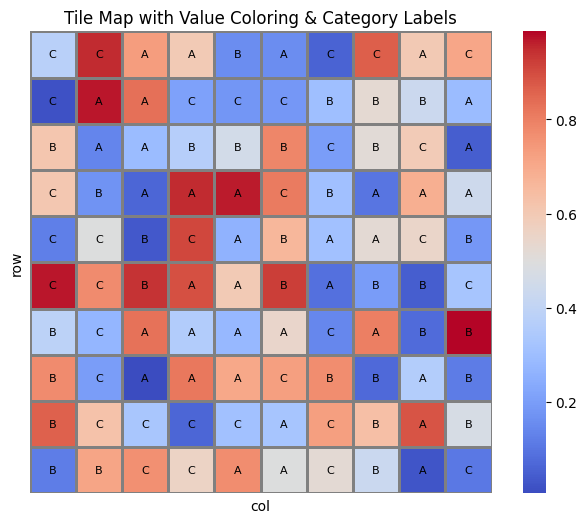

In [22]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(42)
n = 100
values = np.random.rand(n)
categories = np.random.choice(['A', 'B', 'C'], size=n)

# Create DataFrame
df = pd.DataFrame({
    'value': values,
    'category': categories
})

# Reshape to 10x10 grid
df['row'] = df.index // 10
df['col'] = df.index % 10

# Plot: each tile's color represents 'value', hue border = category
fig, ax = plt.subplots(figsize=(8, 6))
pivot = df.pivot(index='row', columns='col', values='value')
sns.heatmap(pivot, cmap='coolwarm', cbar=True, linewidths=1, linecolor='gray', square=True, ax=ax)

# Optional: add category border/labels (not shown in heatmap)
for _, row in df.iterrows():
    ax.text(row['col'] + 0.5, row['row'] + 0.5, row['category'],
            ha='center', va='center', color='black', fontsize=8)

plt.title("Tile Map with Value Coloring & Category Labels")
plt.xticks([])
plt.yticks([])
plt.show()

**Shape Coding & Icon Maps**

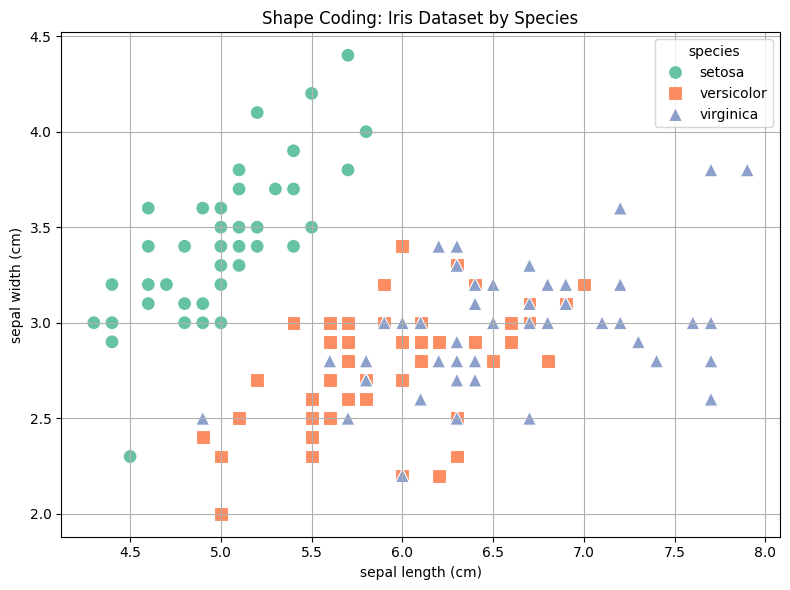

In [23]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Shape coding: different marker shapes for each species
markers = {"setosa": "o", "versicolor": "s", "virginica": "^"}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='species',
    style='species',
    markers=markers,
    palette='Set2',
    s=100
)
plt.title("Shape Coding: Iris Dataset by Species")
plt.grid(True)
plt.tight_layout()
plt.show()

# HIERARCHICAL VISUALIZATION TECHNIQUES

**Tree**

In [25]:
# @title
!pip install anytree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.2 MB/s eta 0:00:00


In [26]:
# @title
from anytree import Node, RenderTree

# Define tree structure
root = Node("Company")
dept1 = Node("Engineering", parent=root)
Node("Backend", parent=dept1)
Node("Frontend", parent=dept1)

dept2 = Node("Marketing", parent=root)
Node("Social Media", parent=dept2)
Node("SEO", parent=dept2)

# Print the tree
for pre, _, node in RenderTree(root):
    print(f"{pre}{node.name}")

Company
├── Engineering
│   ├── Backend
│   └── Frontend
└── Marketing
    ├── Social Media
    └── SEO


In [27]:
# @title
pip install pygraphviz pydot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)


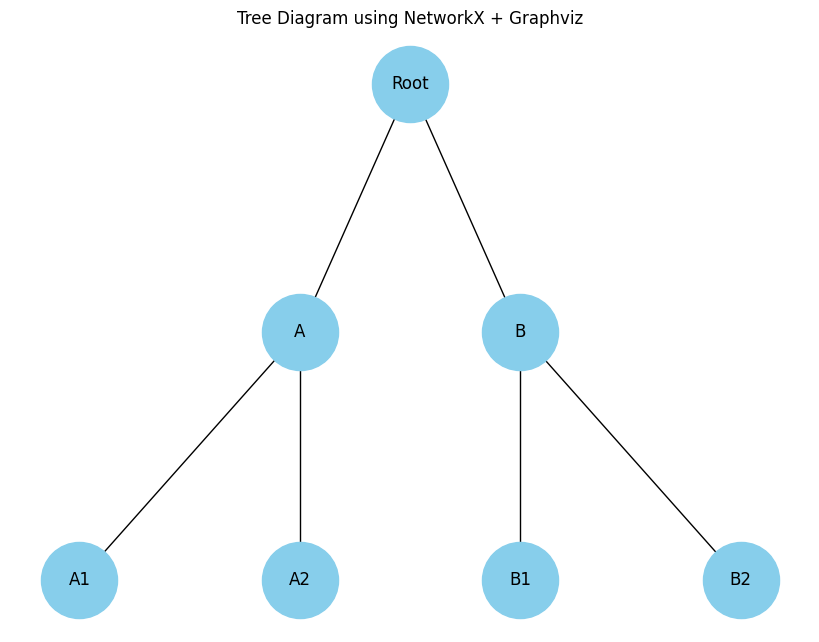

In [28]:
# @title
import matplotlib.pyplot as plt
import networkx as nx

# Define edges for a small tree
edges = [
    ("Root", "A"),
    ("Root", "B"),
    ("A", "A1"),
    ("A", "A2"),
    ("B", "B1"),
    ("B", "B2")
]

# Create directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Use hierarchy layout
pos = nx.nx_pydot.graphviz_layout(G, prog="dot")

# Plot
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=False, node_size=3000, node_color="skyblue", font_size=12)
plt.title("Tree Diagram using NetworkX + Graphviz")
plt.show()


**Treemaps**

In [30]:
# @title
pip install squarify

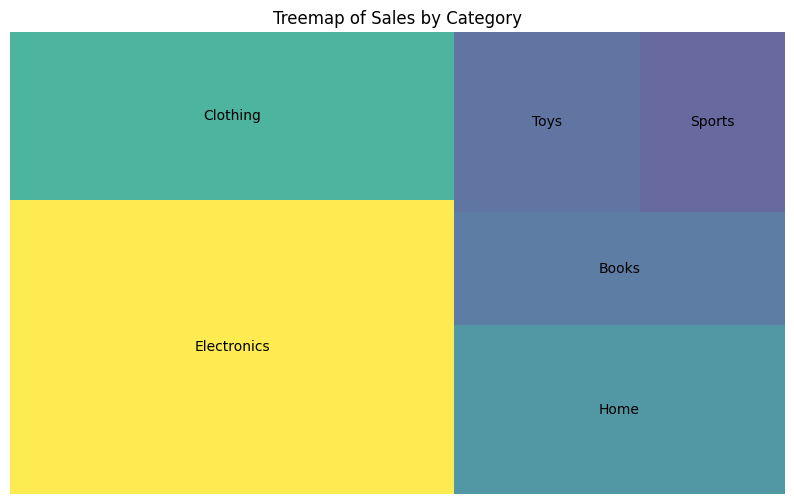

In [32]:
# @title
import matplotlib.pyplot as plt
import squarify  # for treemap
import pandas as pd

# Simulated data: product categories and their sales
data = {
    'Category': ['Electronics', 'Clothing', 'Home', 'Books', 'Toys', 'Sports'],
    'Sales': [350, 200, 150, 100, 90, 70]
}

df = pd.DataFrame(data)

# Optional: color mapping
colors = plt.cm.viridis(df['Sales'] / max(df['Sales']))  # Normalize sales for color

# Plot treemap
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=df['Sales'],
    label=df['Category'],
    color=colors,
    alpha=0.8
)
plt.title("Treemap of Sales by Category")
plt.axis('off')  # Hide axes
plt.show()


**Sunburst Charts**

In [34]:
# @title
import plotly.express as px
import pandas as pd

# Sample data: category > subcategory > product
data = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Clothing'],
    'Subcategory': ['Phones', 'Phones', 'Laptops', 'Chairs', 'Tables', 'Shirts'],
    'Product': ['iPhone', 'Samsung', 'MacBook', 'Office Chair', 'Dining Table', 'T-Shirt'],
    'Sales': [300, 250, 400, 150, 120, 100]
})

# Create Sunburst
fig = px.sunburst(
    data,
    path=['Category', 'Subcategory', 'Product'],
    values='Sales',
    color='Sales',
    color_continuous_scale='Viridis'
)

fig.update_layout(title="Sunburst Chart: Product Sales Breakdown")
fig.show()


**Icicle Plots**

In [35]:
# @title
import plotly.express as px
import pandas as pd

# Sample hierarchical data
df = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Clothing'],
    'Subcategory': ['Phones', 'Phones', 'Laptops', 'Chairs', 'Tables', 'Shirts'],
    'Product': ['iPhone', 'Samsung', 'MacBook', 'Office Chair', 'Dining Table', 'T-Shirt'],
    'Sales': [300, 250, 400, 150, 120, 100]
})

# Plot Icicle chart
fig = px.icicle(
    df,
    path=['Category', 'Subcategory', 'Product'],
    values='Sales',
    color='Sales',
    color_continuous_scale='Blues'
)

fig.update_layout(title="Icicle Plot: Product Sales Breakdown", margin=dict(t=40, l=10, r=10, b=10))
fig.show()


**Dendrograms**

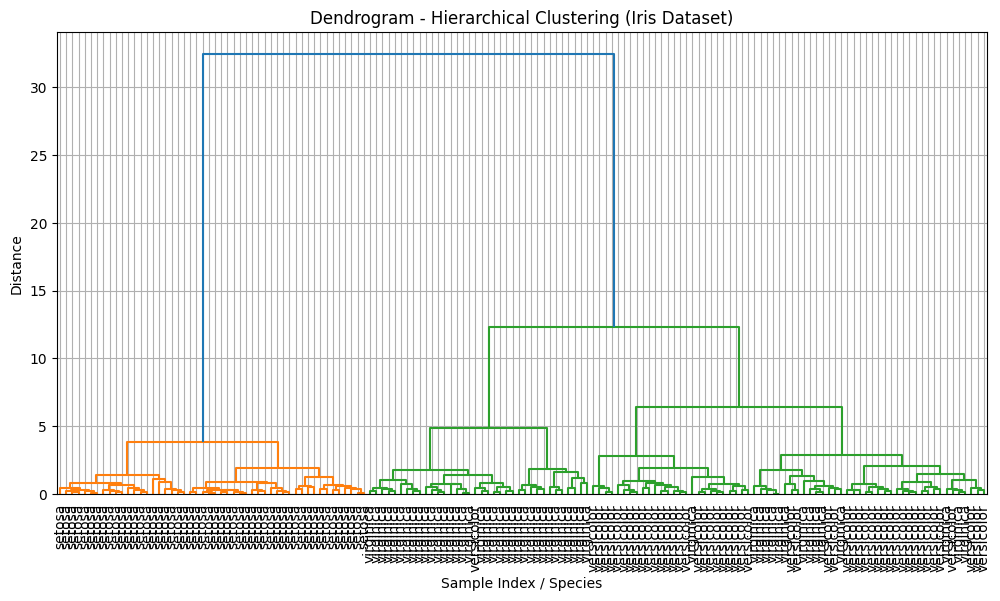

In [37]:
# @title
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Perform hierarchical clustering
linked = linkage(data, method='ward')  # 'ward' minimizes within-cluster variance

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=iris.target_names[iris.target],
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=15)
plt.title('Dendrogram - Hierarchical Clustering (Iris Dataset)')
plt.xlabel('Sample Index / Species')
plt.ylabel('Distance')
plt.grid(True)
plt.show()
